# Automodeals

### Basic Information

Title: KSL AutomoDeals
<br>
Names: Chantel Charlebois, Taylor Hansen, Michael Paskett
<br>
E-mails: chantel.charlebois@utah.edu, taylor.c.hansen@utah.edu, michael.paskett@utah.edu
<br>
UIDS: u1043299, u0642850, u1144000

### Background and Motivation

Almost every person in Utah (and some neighboring states) buying a used car will visit KSL Cars classifieds to look for their new wheels. There are few resources for understanding the rough value of a used car, such as Kelly Blue Book (kbb.com), but such services cannot fully integrate the complex auto market of a local area. By storing and analyzing the prices, details, and options for a certain model or class of vehicle, a prospective buyer can evaluate how good the listed price for a vehicle actually is. With such a model, the user can estimate how much a specific car is really worth, and determine if the vehicle is worthy of a test drive.

### Project Objectives

Questions:
* How well can we predict the price of a newly-listed car based on the attributes available in an advertisement?
* Which attributes are most influential in determining the vehicle price?
* What areas have the best price of cars?
Aims:
* Create a regression model that will predict the expected price of a car based on several attributes, such as:
    * year,  seller type (dealer, private), mileage, color, title (clean/salvaged), transmission type, cylinders, fuel type, number of doors, exterior/interior condition, listing date, page views per day (when a listing has reached 7 days)
* Create a clustered map of “good deals” in different regions

Benefits:
* This project could benefit anyone in the market for a used car, helping them to be informed of the potential value of a car they are interested in.

### Data

We scraped our data from queries of used cars listed on [cars.ksl.com](https://cars.ksl.com/). We have read the robots.txt files for both ksl.com and cars.ksl.com to confirm that there are no restrictions for crawling their website. We have also reviewed the terms and conditions and have similarly found no indication for rules on crawling. There used to be an undocumented API for interfacing with KSL (as of four years ago), but it is no longer publicly accessible, so we will be manually scraping with BeautifulSoup.

To avoid consistently using too much bandwidth on their website, we started with “historical” data collection by saving .html pages over the course of the project so that we can parse them offline. However, we now dynamically scrape data and the information we scrape is dynamically loaded by JavaScript, the html files were bloated with other associated files which would be too unwieldy to download on a daily basis (on the order of 5,000 cars/day). Instead, we opted for a live crawler approach to get our data.

We used CarGurus website https://www.cargurus.com/Cars/sell-car/?pid=SellMyCarDesktopHeader and their API to request an expected car price based on each cars Make, Model, Mileage, Year, and Zip Code. 

### Ethical Considerations

Stakeholders:
* The creators (us)
* The seller
* The prospective buyer
* KSL

Our incentive as creators and prospective buyers is to find good deals without having to manually spend hours searching through KSL for a good deal. For other prospective buyers, the same applies. The sellers have competing interests, as they would like to sell their car for as much as possible. KSL also has a stake in this project, as it makes revenue from ads and from sellers paying for better listings in order to make their vehicle more prominent.
We anticipate that other ethical considerations may arise as the project progresses and details are worked out.b

### Data Processing

Each listing page has a fairly consistent format making scraping feasible for the large number of pages we will be analyzing. The quantities we plan to derive from our data have been listed above in the Project Objectives section. When creating a listing, the user is required to list the year, VIN, make, model, body style, mileage, title type, asking price, and ZIP code. A timestamp is also associated with each listing. Together, these are the only features we can guarantee to extract from each page. Of course, many listings have many more details listed than these which we can and plan to use.

As mentioned above, data will be scraped  with BeautifulSoup and will be structured into a pandas dataframe. Dummy variables for categorical variables may be generated and concatenated to this dataframe to facilitate use of these variables. Subsequent processing will be done using built-in pandas masking to get relevant rows from the dataframe for new queries when searching recently listed used cars.

#### Data Scraping
1. KSL - main car infor, favorites, views
2. Expected price from CarGurus and Zip Codes

#### KSL

#### Expected Price from CarGurus and Zip Codes

In [3]:
# import requests
# import pandas as pd
# import os
# import numpy as np
# import bs4
# import time

In [4]:
# # Read in scraped car data
# data_file = os.path.join(os.getcwd(),"data","all_cars.csv") 
# cars = pd.read_csv(data_file)
# pd.set_option("display.max_columns",None) 
# cars['mileage'] = cars['mileage'].astype('Int64')
# cars['year'] = cars['year'].astype('Int64')
# cars.info()

In [5]:
# # Create dictionary of zip codes for all towns to look up expected price
# # Website to look up zipcodes
# # http://localistica.com/usa/ut/salt%20lake%20city/zipcodes/all-zipcodes/

# def get_most_populated_zip_code(city):
#     try:
#         r = requests.get(f'http://localistica.com/search.aspx?q={city.lower().replace(" ", "+")}')
#         url = bs4.BeautifulSoup(r.text).find("a", id="ctl09_hlZipCodesCount")['href']
#         return int(bs4.BeautifulSoup(requests.get(url).text).find(id="dgZipCodes").find_all("tr")[1].td.a.text)
#     except:
#         return None
    

# # get unique cities in dataframe
# all_cities = [car for car in cars.city.unique() if type(car) == str]
# keyList = [x + ", " + cars[cars.city == x].iloc[0]['state'] for x in all_cities]
# # look up zipcode
# zip_codes = {key: get_most_populated_zip_code(key + " " + cars[cars.city == key].iloc[0]['state']) for key in all_cities}
# # hard code the ones it missed
# zip_codes.update({'St. Anthony': 83445, 'Provo Canyon': 84604})
# # check for missing zip codes
# print(len([k for k,v in zip_codes.items() if v == None]))
# zip_codes

In [7]:
# # list of all cars in CarGurus database
# all_cars = requests.get("https://www.cargurus.com/Cars/getCarPickerReferenceDataAJAX.action?showInactive=false&useInventoryService=false&quotableCarsOnly=false&localCountryCarsOnly=true&outputFormat=REACT").json()

# # gets CarGuru make and model id to find price for individual make and model
# def get_cargurus_maker_and_model_ids(all_cars, car_make, car_model):
#     try:
#         all_models = [x for x in all_cars.get('allMakerModels').get('makers') if x.get('name') == car_make][0]
#         return (all_models.get('id'), [x for x in all_models.get('models') if x.get('name') == car_model][0].get('id'))
#     except (IndexError, AttributeError):
#         return (None, None)
    
# # gets the entity id which includes the make, model, and year of car
# def get_entity_id(maker_id, model_id, car_year):
#     try:
#         all_entities = requests.get(f"https://www.cargurus.com/Cars/getSelectedMakerModelCarsAJAX.action?showInactive=false&useInventoryService=false&quotableCarsOnly=false&localCountryCarsOnly=true&outputFormat=REACT&maker={maker_id}").json()
#         model_entity_ids = [car for car in all_entities.get('models') if car.get('id') == model_id][0]
#         return [ids for ids in model_entity_ids.get('cars') if ids.get('year') == car_year][0].get('id')
#     except (IndexError, AttributeError):
#         return None
    
# # gets the estimated listing price of the car based on entity id and the mileage
# def get_price(car_make, car_model, car_year, car_mileage, car_zip_code, all_cars):
#     maker_id, model_id = get_cargurus_maker_and_model_ids(all_cars, car_make, car_model)
#     if not model_id or pd.isna(car_mileage):
#         return None
    
#     entity_id = get_entity_id(maker_id, model_id, car_year)
    
#     if not entity_id:
#         return None 
#     # data needed to request CarGurus report
#     data = {
#         'carDescription.radius': 75,
#         'selectedEntity': entity_id,
#         'carDescription.transmission': "",
#         'carDescription.mileage': car_mileage,
#         'carDescription.postalCode': car_zip_code,
#         'carDescription.engineId': "",
#         'carDescription.vin': "",
#         'carDescription.vinType': "",
#         'forPrivateListing': True,
#         'inventoryListingId' : ""
#     }
    
#     res = requests.post("https://www.cargurus.com/Cars/generateReportJsonAjax.action", data=data)
#     res.raise_for_status()
#     try:
#         return res.json().get("priceDetails").get("privateListingPrice") #private listing price from CarGurus report
#     except AttributeError:
#         raise Exception(res.json())


# for index, row in cars.iterrows():
#     if row["city"] in zip_codes.keys():
#         try:
#             expected_price = get_price(row["make"], row["model"], row["year"], row["mileage"], zip_codes.get(row["city"]), all_cars)
#         except Exception as e:
#             print(e)
#             time.sleep(5)
#             continue
#         # change expected prices that are 0 to none
#         if expected_price == None or expected_price < 1:
#             expected_price = None 
#             print(index)
#         cars.loc[index, "expected_price"] = expected_price
#     else:
#         cars.loc[index, "expected_price"] = None

# # Add zip codes to a column
# for index, row in cars.iterrows():
#     cars.loc[index, "zip_code"] = zip_codes.get(row["city"])
    
# # save cars dataframe to pickle
# cars.to_pickle("./cars.pkl")

# pickle_cars.info() # 36,325 expected prices

### Exploratory Analysis

We will visualize our data in multiple ways to check our data scraping procedures and make sure we did not incorrectly classify our data. The first basic check we will do is scrolling through the data frame for any obvious errors using the display command. We will then use the describe command to look at the descriptive statistics of each column in our dataframe. Next we will visualize the data using a scatterplot matrix in order to check the histograms of each parameter for outliers and general trends. We can also use the scatterplot matrix to explore correlations between different parameters. We will also visualize a heat map of the correlation matrix to determine which parameters are strongly correlated. This information will be used to identify potential strong predictors for the multiple linear regression and determine if any parameters are potential confounders.

1. Scroll through the dataframe for any obvious errors
2. Describe command to verify the descriptive statistics
3. Visualize using the scatterplot matrix to explore histograms of each parameter and look for outliers/trends
4. Heat map of the correlation matrix to determine which parameters are strongly correlated to identify potential strong predictors for the multiple linear regression or potential confounders

In [8]:
import pandas as pd
import os
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as sm
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [9]:
# Read in scraped car data
data_file = os.path.join(os.getcwd(),"data","all_cars.csv")  
cars = pd.read_csv(data_file)
# cars = pd.read_pickle('cars.pkl')
pd.set_option("display.max_rows",None,"display.max_columns",None) 

# Recast data
cars['mileage'] = cars['mileage'].astype('float')
cars['year'] = cars['year'].astype('float')

# Clean price data and recast
ugly_cars = cars[cars['price'].str.contains('MSRP')]
ugly_cars.index
for index, car in ugly_cars.iterrows():
    if '|' not in car['price']:
        cars.at[index,'price'] = None
    else:
        cars.at[index,'price'] = car['price'].split('|')[0].strip()
cars['price'] = cars['price'].astype('float')

#### Descriptive Statistics

In [10]:
display(cars.describe())
display(cars.info())

,lastpull_ts,price,year,mileage,liters,cylinders,n_doors,n_pics,expected_price,zip_code,views,favorites,workingURL,view_rate,favorite_rate,fav_per_view
count,5.389700e+04,5.388500e+04,53890.000000,5.375600e+04,3895.000000,53400.000000,41296.000000,53897.000000,36325.000000,53611.000000,47937.000000,47937.000000,53897.000000,4.793700e+04,4.793700e+04,4.793600e+04
mean,1.585342e+09,1.863960e+04,2012.532362,1.317392e+05,3.832914,5.670487,3.855507,20.103939,17138.161376,84139.351103,305.316228,7.681499,0.836169,5.009282e-09,1.274098e-10,inf
std,3.810373e+05,5.549875e+04,7.643743,9.342829e+06,15.987546,1.584938,0.575834,14.062686,10007.654668,954.334584,667.094249,14.333028,0.370126,1.272314e-08,2.790996e-10,NaN
min,1.584808e+09,1.000000e+00,1900.000000,1.000000e+00,0.000000,1.000000,-1.000000,0.000000,200.000000,21076.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.585022e+09,8.375000e+03,2010.000000,3.033300e+04,2.400000,4.000000,4.000000,9.000000,10194.000000,84025.000000,34.000000,1.000000,1.000000,4.590000e-10,7.800000e-12,4.752008e-03
50%,1.585277e+09,1.580000e+04,2015.000000,6.476400e+04,3.500000,6.000000,4.000000,20.000000,15177.000000,84081.000000,107.000000,3.000000,1.000000,1.540000e-09,3.940000e-11,2.272727e-02
75%,1.585632e+09,2.500000e+04,2017.000000,1.184592e+05,5.000000,6.000000,4.000000,29.000000,22053.000000,84101.000000,311.000000,9.000000,1.000000,4.680000e-09,1.310000e-10,3.819480e-02
max,1.586152e+09,1.234568e+07,2020.000000,2.147484e+09,996.000000,12.000000,5.000000,214.000000,260109.000000,97913.000000,31052.000000,495.000000,1.000000,8.950000e-07,9.130000e-09,inf


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53897 entries, 0 to 53896
Data columns (total 34 columns):
post_date         53897 non-null object
lastpull_ts       53897 non-null int64
link              53897 non-null object
price             53885 non-null float64
year              53890 non-null float64
make              53894 non-null object
model             53893 non-null object
body              53782 non-null object
mileage           53756 non-null float64
title_type        28793 non-null object
city              53611 non-null object
state             53611 non-null object
seller            53897 non-null object
trim              45047 non-null object
ext_color         50306 non-null object
int_color         45125 non-null object
transmission      48804 non-null object
liters            3895 non-null float64
cylinders         53400 non-null float64
fuel_type         53663 non-null object
n_doors           41296 non-null float64
ext_condition     16478 non-null object
int_con

None

,lastpull_ts,price,year,mileage,liters,cylinders,n_doors,n_pics,expected_price,zip_code,views,favorites,workingURL,view_rate,favorite_rate,fav_per_view
count,5.389700e+04,53864.000000,53888.000000,53723.000000,3894.00000,53400.000000,41296.000000,53897.000000,36325.000000,53611.000000,47937.000000,47937.000000,53897.000000,4.793700e+04,4.793700e+04,47935.000000
mean,1.585342e+09,18371.249684,2012.536520,80052.217821,3.57812,5.670487,3.855507,20.103939,17138.161376,84139.351103,305.316228,7.681499,0.836169,5.009282e-09,1.274098e-10,0.027150
std,3.810373e+05,13871.962529,7.613351,62200.389323,1.65511,1.584938,0.575834,14.062686,10007.654668,954.334584,667.094249,14.333028,0.370126,1.272314e-08,2.790996e-10,0.031623
min,1.584808e+09,100.000000,1923.000000,1.000000,0.00000,1.000000,-1.000000,0.000000,200.000000,21076.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.585022e+09,8400.000000,2010.000000,30316.500000,2.40000,4.000000,4.000000,9.000000,10194.000000,84025.000000,34.000000,1.000000,1.000000,4.590000e-10,7.800000e-12,0.004750
50%,1.585277e+09,15800.000000,2015.000000,64691.000000,3.50000,6.000000,4.000000,20.000000,15177.000000,84081.000000,107.000000,3.000000,1.000000,1.540000e-09,3.940000e-11,0.022727
75%,1.585632e+09,25009.500000,2017.000000,118252.000000,5.00000,6.000000,4.000000,29.000000,22053.000000,84101.000000,311.000000,9.000000,1.000000,4.680000e-09,1.310000e-10,0.038194
max,1.586152e+09,399812.000000,2020.000000,481066.000000,16.30000,12.000000,5.000000,214.000000,260109.000000,97913.000000,31052.000000,495.000000,1.000000,8.950000e-07,9.130000e-09,1.000000


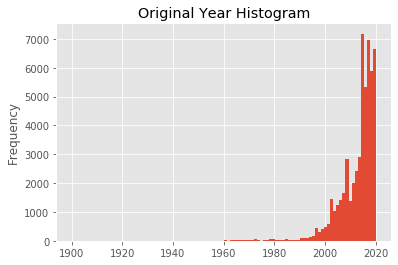

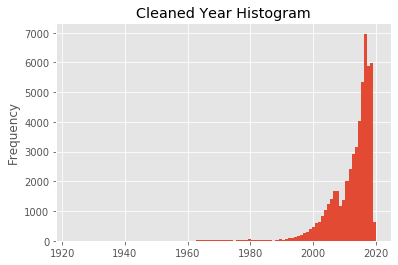

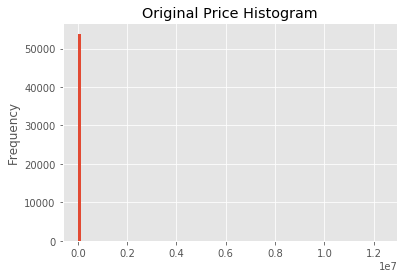

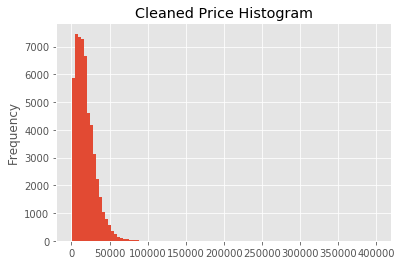

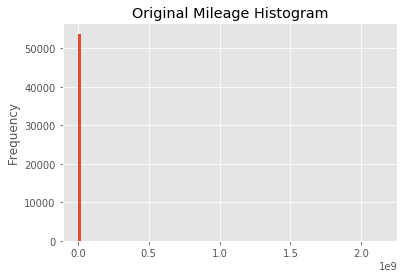

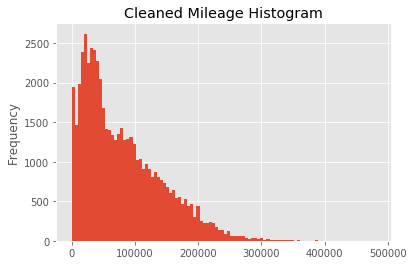

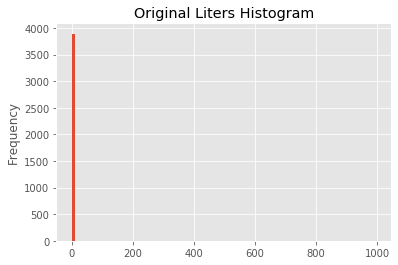

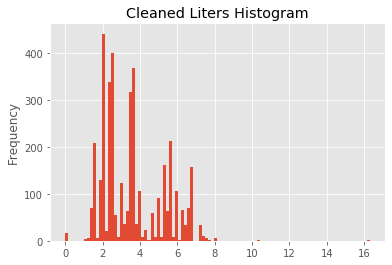

In [11]:
# Data clean up
# Check year
plt.figure()
cars["year"].plot.hist(bins=100)
plt.title('Original Year Histogram')
# any cars with a year less than 1920 changed to None
cars.loc[(cars.year < 1920),'year']=None 
plt.figure()
cars["year"].plot.hist(bins=100)
plt.title('Cleaned Year Histogram')

# Check price
plt.figure()
cars["price"].plot.hist(bins=100)
plt.title('Original Price Histogram')
# any cars with a price less than $100 or greater than $500,000 changed to None
cars.loc[(cars.price < 100),'price']=None 
# expcars = cars['price'] > 500000
# expcars = cars[expcars]
# display(expcars)
cars.loc[(cars.price > 500000),'price']=None 
plt.figure()
cars["price"].plot.hist(bins=100)
plt.title('Cleaned Price Histogram')

# Check Mileage
plt.figure()
cars["mileage"].plot.hist(bins=100)
plt.title('Original Mileage Histogram')
# any cars with a mileage greater than 500000 changed to None
cars.loc[(cars.mileage > 500000),'mileage']=None 
plt.figure()
cars["mileage"].plot.hist(bins=100)
plt.title('Cleaned Mileage Histogram')

# Check Liters
plt.figure()
cars["liters"].plot.hist(bins=100)
plt.title('Original Liters Histogram')
# any cars with a mileage greater than 500000 changed to None
cars.loc[(cars.liters > 100),'liters']=None 
plt.figure()
cars["liters"].plot.hist(bins=100)
plt.title('Cleaned Liters Histogram')

# Check fav_per_view
# any cars with inf or Nan changed to None
cars.loc[(cars.fav_per_view > 2),'fav_per_view']=None 
# cars.loc[(cars.fav_per_view == NaN),'fav_per_view']=None 


cars.describe()

In [12]:
# Explore Categorical Variables
print(cars['body'].value_counts(), '\n')
print(cars['title_type'].value_counts(), '\n')
print(cars['seller'].value_counts(), '\n')
#print(cars['ext_color'].value_counts(), '\n')
print(cars['transmission'].value_counts(), '\n')
print(cars['fuel_type'].value_counts(), '\n')
print(cars['ext_condition'].value_counts(), '\n')
print(cars['int_condition'].value_counts(), '\n')
print(cars['drive_type'].value_counts(), '\n')

Sport Utility        15837
Sedan                13928
Truck                13500
Hatchback             2171
Coupe                 1652
Minivan               1601
SUV                   1389
Wagon                 1182
Van                   1045
Convertible            920
Crossover              285
Compact Car            115
Compact                 79
Industrial / Semi       78
Name: body, dtype: int64 

Clean Title                    25808
Rebuilt/Reconstructed Title     2623
Salvage Title                    354
Dismantled Title                   8
Name: title_type, dtype: int64 

Dealer    43811
Owner     10086
Name: seller, dtype: int64 

Automatic     44128
Manual         3225
Automanual     1259
CVT             192
Name: transmission, dtype: int64 

Gasoline                  43491
Diesel                     4567
Flex Fuel                  4376
Hybrid                      895
Electric                    269
Compressed Natural Gas       49
Bi-Fuel                       8
Ethanol       

#### Data Cleaning Interpretation
Looking at the histograms and descriptive statistics had to clean the data and remove outliers. We changed the data to missing if the car year was greater than 1920, the price was less than 100 dollars or greater than 500000 dollars, the mileage was greater than 500,000 miles, or the liters was greater than 100. This cleaned up most of the outliers and the describe() values look much more realistic.

#### Scatter Matrix & Correlation Matrix

,lastpull_ts,price,year,mileage,liters,cylinders,n_doors,n_pics,expected_price,zip_code,views,favorites,workingURL,view_rate,favorite_rate,fav_per_view
lastpull_ts,1.000000,-0.085628,-0.123134,0.121443,0.058759,0.030572,-0.048644,-0.120208,-0.061948,0.017801,-0.040169,-0.043572,0.132929,0.114518,0.129514,-0.003884
price,-0.085628,1.000000,0.466618,-0.558758,0.274217,0.292010,0.068695,0.254808,0.919681,-0.032742,-0.000413,-0.106348,0.093119,-0.031623,-0.116203,-0.117117
year,-0.123134,0.466618,1.000000,-0.598366,-0.291417,-0.204052,0.379125,0.275042,0.522635,-0.002392,-0.311069,-0.328288,0.087296,-0.296590,-0.315675,-0.028100
mileage,0.121443,-0.558758,-0.598366,1.000000,0.298261,0.198264,-0.089314,-0.282535,-0.548937,-0.009238,0.105319,0.158329,-0.082806,0.109116,0.159191,0.053254
liters,0.058759,0.274217,-0.291417,0.298261,1.000000,0.886438,-0.133256,-0.108032,0.320496,-0.042012,0.145345,0.179753,0.044414,0.117328,0.160066,-0.023884
cylinders,0.030572,0.292010,-0.204052,0.198264,0.886438,1.000000,-0.100590,0.011815,0.361932,-0.014856,0.140958,0.112276,0.012053,0.118710,0.098562,-0.053841
n_doors,-0.048644,0.068695,0.379125,-0.089314,-0.133256,-0.100590,1.000000,0.104543,-0.030630,-0.011673,-0.218506,-0.177330,0.032011,-0.198617,-0.168393,0.044031
n_pics,-0.120208,0.254808,0.275042,-0.282535,-0.108032,0.011815,0.104543,1.000000,0.179563,0.015724,0.031728,0.029659,0.073668,0.005791,-0.000331,0.038751
expected_price,-0.061948,0.919681,0.522635,-0.548937,0.320496,0.361932,-0.030630,0.179563,1.000000,0.013342,0.091574,-0.044852,0.046839,0.045773,-0.056609,-0.114636
zip_code,0.017801,-0.032742,-0.002392,-0.009238,-0.042012,-0.014856,-0.011673,0.015724,0.013342,1.000000,0.012876,-0.001882,0.016269,0.015721,0.001538,-0.010051


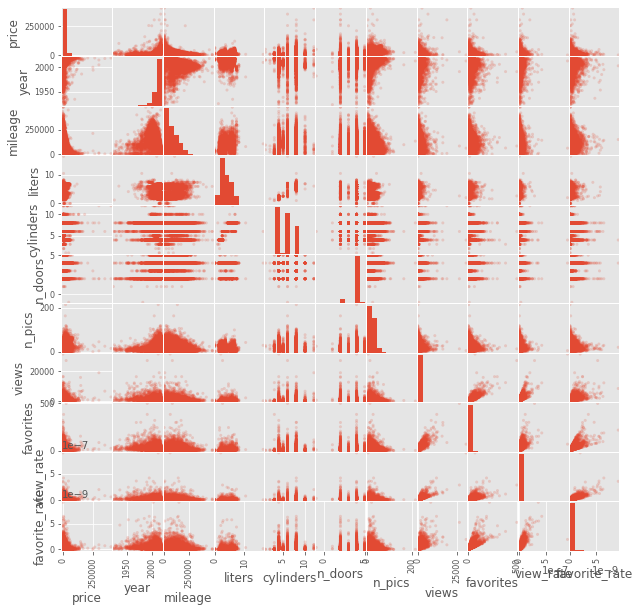

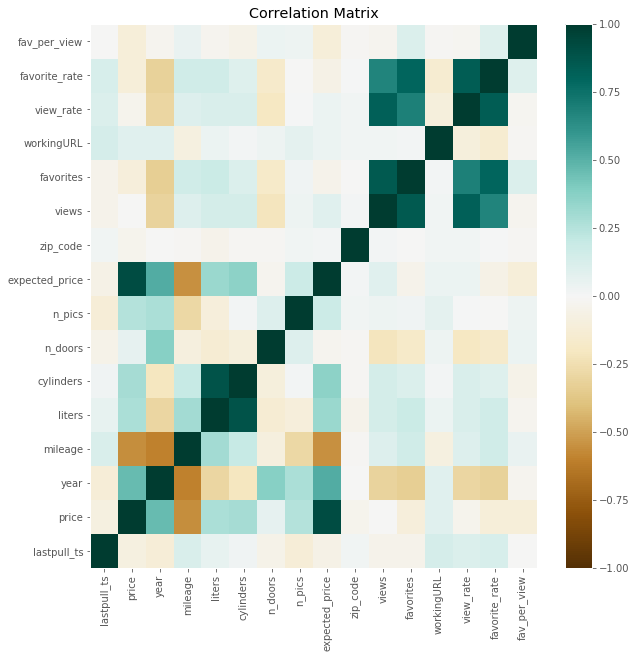

In [13]:
# Check histograms and scatter matrix for outliers
# Scatter Matrix
scatter_matrix(cars[["price", "year", "mileage", "liters", "cylinders", "n_doors", "n_pics",'views','favorites','view_rate','favorite_rate']], alpha = 0.2, figsize=(10, 10))
print()

# Correlation Matrix
# automatically ignores missing values
fig = plt.figure(figsize=(10,10));
ax = fig.add_subplot(111)
plt.pcolor(cars.corr(),vmin=-1,vmax=1, cmap=plt.cm.get_cmap('BrBG'))
labels = ['lastpull_ts','price','year','mileage','liters','cylinders','n_doors','n_pics','expected_price','zip_code','views','favorites','workingURL','view_rate','favorite_rate','fav_per_view'] # check labels for final df
plt.xticks([i+0.5 for i in range(len(labels))],labels=labels,rotation=90)
plt.yticks([i+0.5 for i in range(len(labels))],labels=labels)
plt.title("Correlation Matrix");
plt.colorbar();
display(cars.corr())

#### Data Exploration Interpretation
The descriptive statistics look to be within a reasonable range after data cleaning.

The scatter matrix and correlation matrix show that the strongest correlations are negative for mileage x price ~-0.53, mileage x year ~0.63, year x price ~ 0.45. All of these variables are what we would expect to correlate. 

We will want to include categorical variables like title type in future analyses.

### Analysis Methodology

#### Regression
We will use regression to see if we can predict the price of a newly-listed used car. Our dependent variable will be list price and possible independent variables we will analyze include: year,  seller type (dealer, private), mileage, color, title (clean/salvaged), transmission type, cylinders, fuel type, number of doors, exterior/interior condition, listing date, page views per day (when a listing has reached 7 days). We will use the Python package [statsmodels](http://www.statsmodels.org/stable/index.html) to perform all regression analyses. We will do a multiple linear regression first using the parameters that had strong correlations with list price. Based off of this initial model we will adjust our multiple linear regression to only include parameters that have significant p-values for their individual coefficients. We will use a significance level of 𝝰=0.05. Our final model should have a p-value < 0.05 for the F-statistic of the overall model. We are aiming to explain at least 70% of the variance with our model and hope to get an R-squared value of 0.70 or more.

#### Clustering
We plan to cluster what we classify as a “good deal” in its respective geographical location and create clusters showing areas in Utah where cars are generally sold for a good deal. We're going to create a heat map that displays the average percent difference between the cargurus expected price and the list price to find geographical locations of good deals.

#### Regression
Aim: predict the price of a newly-listed used car
Dependent variable:list price 
Possible independent variables:year, seller type (dealer, private),mileage, color, title (clean/salvaged), transmission type, cylinders, fuel type, number of doors, exterior/interior condition, listing date, page views per day (when a listing has reached 7 days). 
We will use the Python package statsmodels to perform all regression analyses. 
1. Multiple linear regression first using the parameters that had strong correlations with list price. 
2. Based off of this initial model we will adjust our multiple linear regression to only include parameters that have significant p-values for their individual coefficients. 
Significance level: 𝝰=0.05

Expected Outcomes:
* Our final model should have a p-value < 0.05 for the F-statistic of the overall model. 
* We are aiming to explain at least 70% of the variance with our model and hope to get anR-squared value of 0.70 or more.

### Project Schedule

#### February 24th - 28th
* Check data accessibility (robots.txt and terms of conditions) 
* Basic info due Wed Feb 26th
* Project Proposal due Fri Feb 28th
#### March 2nd - 6th
* Download html files for all recent listings from ksl
* Begin data scraping and create one dataframe with each row as a listing
* Get/give peer feedback March 5th
* Written feedback from staff by March 8th
#### March 9th - 13th (Spring Break)
* Finish data scraping 
* Exploratory analysis
* Describe 

#### March 16th - 20th
* Exploratory analysis
    * Scatter Matrix
        * Interpret histograms - check if there are any outliers that could be an error from scraping
        * Interpret correlations
    * Heatmap of Correlation Matrix
        * Interpret Correlations

#### March 23rd - 27th
* Write up project milestone
* Project milestone due March 29th 
* Acquired, cleaned data, EDA, Sketches of your analysis methods, Submit zip file with Jupyter Notebook, data, other resources.

#### March 30th - April 3rd 
* Get staff feedback
* Begin testbed for good deal predictions based on relation to scraped historical dataset

#### April 6th - April 10th
* Finalize predictive model for new listings
* Script and film project video

#### April 13th - 17th
* Polish up repository in preparation for final submission
* Edit and finalize project video
* Project Due Sunday April 19th
* Project awards April 21st



### Peer Feedback
Our Reviewers: Kyle Cornwall, Shushanna Mkrtychyan

* This is pretty similar to cargurus.com and KBB. How is this different than those existing sites?

* How do you know if a car has been in an accident?

* Look for granularity of NADAguides and devise ways that we can "beat" that model.

* Consider doing feature transformation when doing regression.

* Can you enhance the dataset with some other website?

* What features do other car valuation websites use to generate their price predictions?

* Can you get Carfax info from VIN? (without breaking the bank)

* Three potential classes when predicting a value (good, average, bad)

* Might need to downselect the number of cars we can predict prices for since our dataset size could be limited (i.e. top 20 most frequent cars)

### Video

Add link to final video